# Computational Techniques for Data Science
## Module 3
## Stephen Korir
## 193218
## Week 5

In [5]:
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 160.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# Question 1
**One: Steady-State Probability Calculation** 

You are given the following 3×3 transition matrix representing the state changes of a system over time:

```
P = [
  [0.7, 0.2, 0.1],
  [0.3, 0.4, 0.3],
  [0.3, 0.2, 0.5]
]
```

**Tasks:**

1. Represent the matrix in Python using NumPy.
2. Verify if this matrix is a valid stochastic matrix.
3. Compute the steady-state probabilities analytically using Python

In [7]:
import numpy as np

# Define the transition matrix
P = np.array([
    [0.7, 0.2, 0.1],
    [0.3, 0.4, 0.3],
    [0.3, 0.2, 0.5]
])

# Is it a valid stochastic matrix
is_stochastic = np.allclose(P.sum(axis=1), 1)
print("Is stochastic:", is_stochastic)

# Compute steady-state probabilities

A = P.T - np.eye(3)
A = np.vstack([A, np.ones(3)])
b = np.array([0, 0, 0, 1])

steady_state = np.linalg.lstsq(A, b, rcond=None)[0]
print("Steady-state probabilities:", steady_state)


Is stochastic: True
Steady-state probabilities: [0.5  0.25 0.25]


# Question 2

**Two: Markov Chain Simulation and Visualization** 

Using the same transition matrix P in question One, simulate a Markov chain for 50 time steps starting from state 0.

**Tasks:**

1. Simulate the Markov chain and record the state at each time step.
2. Count how many times each state was visited.
3. Plot the sequence of visited states over time using *matplotlib*.
4. Visualize the frequency distribution of states visited using a bar plot.

State visit counts: [28, 11, 11]


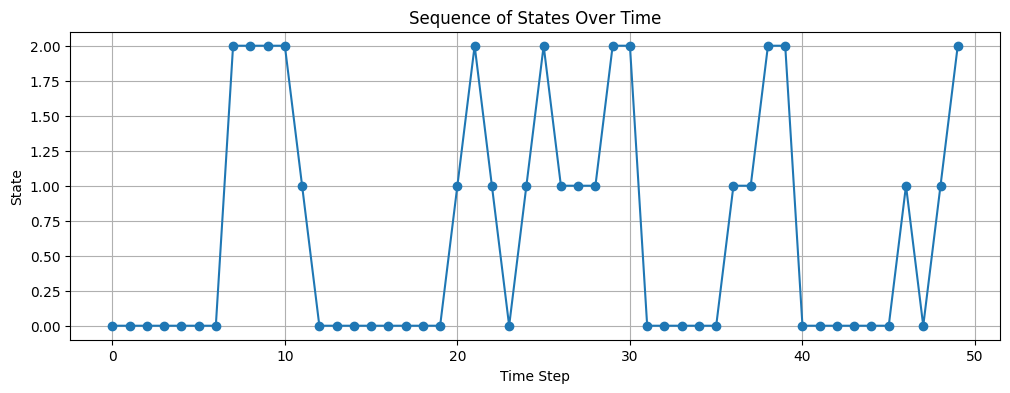

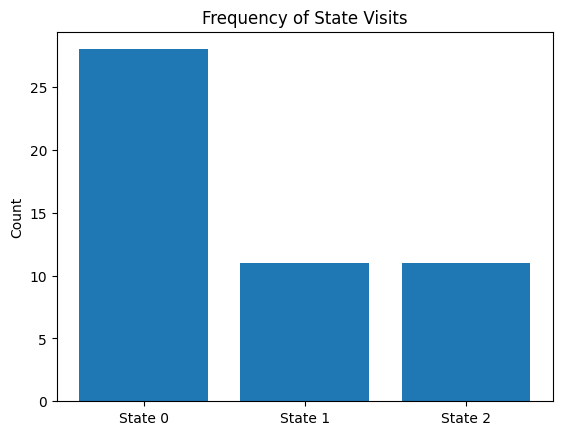

In [ ]:
import matplotlib.pyplot as plt

# parameters
n_steps = 50
states = [0]
current_state = 0

# Simulate the Markov Chain
for _ in range(n_steps - 1):
    current_state = np.random.choice([0, 1, 2], p=P[current_state])
    states.append(current_state)

# Count state visits
state_counts = [states.count(i) for i in range(3)]
print("State visit counts:", state_counts)

# Plot sequence of visited states
plt.figure(figsize=(12, 4))
plt.plot(states, marker='o')
plt.title("Sequence of States Over Time")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.grid(True)
plt.show()

# Bar plot of state visit frequencies
plt.figure()
plt.bar([0, 1, 2], state_counts, tick_label=["State 0", "State 1", "State 2"])
plt.title("Frequency of State Visits")
plt.ylabel("Count")
plt.show()


# Question 3

**Three: Network Visualization of State Transitions** 

Using the transition matrix matrix P in question One again, create a directed graph of the Markov chain.
Tasks:
1. Use networkx to create a directed graph where:
   - Nodes represent the states (0, 1, 2).
   - Edges represent transitions with weights corresponding to transition probabilities.
2. Draw the graph using matplotlib.
3. Use edge thickness or labels to indicate the strength of the transition probabilities

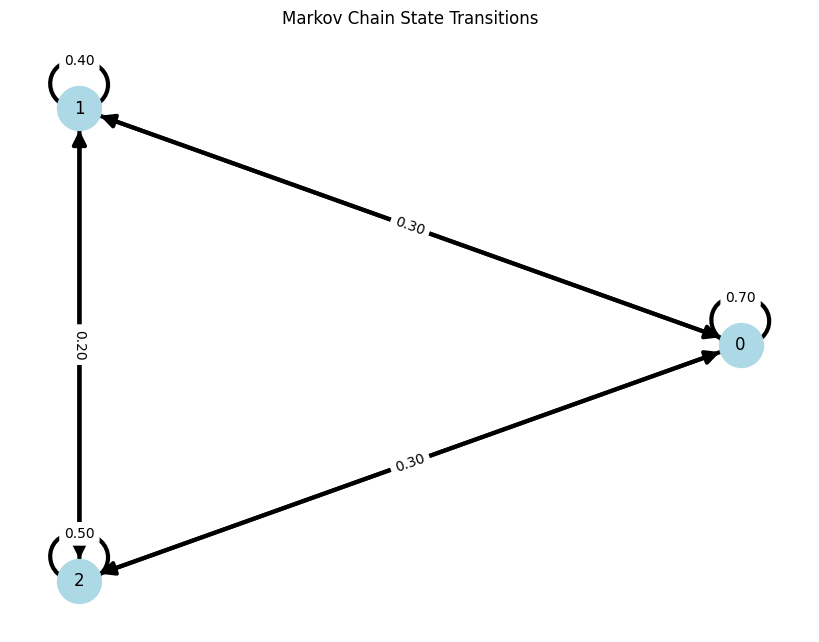

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and weighted edges
for i in range(3):
    for j in range(3):
        G.add_edge(i, j, weight=P[i, j])

# Draw the graph
pos = nx.circular_layout(G)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
labels = {(i, j): f"{P[i][j]:.2f}" for i in range(3) for j in range(3)}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, arrowsize=20, width=3)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Markov Chain State Transitions")
plt.show()
